In [1]:
%matplotlib notebook

In [2]:
from divtel import *

## Load a CTA configuration

In [3]:
# Note that if the radius is in meters, 
# you can set LoadConfig(file, radius="meters")
# defalut is in degrees

array = LoadConfig("./config/test_config.txt")

## Check configuration table

In [4]:
#all telescope information can be displayed in an astropy table format
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-20.64,-64.82,34.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,67.39
2,79.99,-0.77,29.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,84.28
3,-19.4,65.2,31.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,67.09
4,-120.03,1.15,33.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,116.02
5,-0.02,-0.0,24.0,0.000,0.000,1.571,16.000,1.077,0.014,1.000,-0.000,0.000,4.64
6,1.43,151.02,25.0,0.000,0.000,1.571,16.000,1.077,0.014,1.000,-0.000,0.000,151.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,245.9,-327.43,27.25,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,412.07


In [5]:
# An attribute, Array.table.units, determines the units of `az`, `alt`, `zn`, `radius`, `fov` units (deg or rad)
# Default unit is rad

array.table.units = "deg"
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-20.64,-64.82,34.0,0.000,0.000,90.000,28.000,2.150,14.536,1.000,-0.000,0.000,67.39
2,79.99,-0.77,29.0,0.000,0.000,90.000,28.000,2.150,14.536,1.000,-0.000,0.000,84.28
3,-19.4,65.2,31.0,0.000,0.000,90.000,28.000,2.150,14.536,1.000,-0.000,0.000,67.09
4,-120.03,1.15,33.0,0.000,0.000,90.000,28.000,2.150,14.536,1.000,-0.000,0.000,116.02
5,-0.02,-0.0,24.0,0.000,0.000,90.000,16.000,3.850,46.707,1.000,-0.000,0.000,4.64
6,1.43,151.02,25.0,0.000,0.000,90.000,16.000,3.850,46.707,1.000,-0.000,0.000,151.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,245.9,-327.43,27.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,412.07


## Activate the divergent pointing mode

In [6]:
# Apply divergence corresponding to div = 0.01 when pointing the array CoG to az=180, alt=70
array.divergent_pointing(div = 0.01, az = 180, alt = 70)

#array.set_pointing_coord(az=180, alt=70)
#array.divergent_pointing(0.01)

## Check the average of the telescope array location

In [7]:
#Position on the ground of the array CoG, with respect to the central telescope --> defined in corsika files

array.calc_mean(["x", "y", "z"])

array([-4.22894737,  0.04      , 25.94736842])

## Check the average of the telescope pointing vector

In [8]:
array.calc_mean(["p_x", "p_y", "p_z"])

array([-3.40997683e-01,  1.21178550e-06,  9.39246260e-01])

## Check the hyper field of view (hFoV)

In [9]:
# The function hFoV gives the area covered by the telescopes in squared deg 
# And the average number of telescopes covering it (m_ave)
array.hFoV()

100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.28it/s]


(146.20757578842654, 6.024217418602565)

In [10]:
# The value of the hFoV area covered by at least m_ave telescopes is computed specifying this value.
# Default value is m_cut=0
array.hFoV(m_cut=3)

100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.70it/s]


(70.59246394018298, 10.36150845253576)

## Convert (radians or meters) to degrees

In [11]:
array.table.units = "deg"
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-20.64,-64.82,34.0,178.919,69.924,20.076,28.000,2.150,14.536,-0.343,-0.006,0.939,67.39
2,79.99,-0.77,29.0,179.986,70.461,19.539,28.000,2.150,14.536,-0.334,-0.000,0.942,84.28
3,-19.4,65.2,31.0,181.087,69.925,20.075,28.000,2.150,14.536,-0.343,0.007,0.939,67.09
4,-120.03,1.15,33.0,180.018,69.393,20.607,28.000,2.150,14.536,-0.352,0.000,0.936,116.02
5,-0.02,-0.0,24.0,179.999,70.019,19.981,16.000,3.850,46.707,-0.342,-0.000,0.940,4.64
6,1.43,151.02,25.0,182.532,70.011,19.989,16.000,3.850,46.707,-0.342,0.015,0.940,151.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,245.9,-327.43,27.25,174.102,71.268,18.732,5.600,4.450,62.462,-0.319,-0.033,0.947,412.07


## Check the ICRS coordinate of the pointing

In [12]:
array.frame.info
array.get_pointing_coord(icrs=True)

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2024-01-21T10:58:40.480


<SkyCoord (ICRS): (ra, dec) in deg
    [(267.19594937,  8.69805058), (266.82646116,  9.23223853),
     (266.44313078,  8.70058074), (266.81279859,  8.16472916),
     (266.82092044,  8.79045312), (265.94508749,  8.80125749),
     (267.69619028,  8.793293  ), (266.39288516,  9.60169858),
     (267.26944806,  9.60125089), (267.24245611,  7.98952681),
     (266.37897322,  7.99920077), (268.66312066,  7.47040217),
     (264.94064202,  7.46350323), (268.74500114, 10.12213831),
     (264.92892297, 10.1459924 ), (267.52324507,  6.15608062),
     (266.05160158,  6.16588328), (267.62960717, 11.49325621),
     (266.08201834, 11.5057569 )]>

## Export cfg file

In [13]:
# A function to generate sim_telarray config file was implemented 
# this file is strongly dependent on the production: don't trust it too much, cross check witrh official files

array.export_cfg(verbose=True)

#ifndef TELESCOPE

#  define TELESCOPE 0

#endif

#if TELESCOPE == 0

   TELESCOPE_THETA=20.00 

   TELESCOPE_PHI=180.00 



% Global and default configuration for things missing in telescope-specific config.

#  include <CTA-ULTRA6-LST.cfg>



#elif TELESCOPE == 1

#  include <CTA-ULTRA6-LST.cfg>

   TELESCOPE_THETA=20.08

   TELESCOPE_PHI=181.08



#elif TELESCOPE == 2

#  include <CTA-ULTRA6-LST.cfg>

   TELESCOPE_THETA=19.54

   TELESCOPE_PHI=180.01



#elif TELESCOPE == 3

#  include <CTA-ULTRA6-LST.cfg>

   TELESCOPE_THETA=20.08

   TELESCOPE_PHI=178.91



#elif TELESCOPE == 4

#  include <CTA-ULTRA6-LST.cfg>

   TELESCOPE_THETA=20.61

   TELESCOPE_PHI=179.98



#elif TELESCOPE == 5

#  include <CTA-ULTRA6-MST-NectarCam.cfg>

   TELESCOPE_THETA=19.98

   TELESCOPE_PHI=180.00



#elif TELESCOPE == 6

#  include <CTA-ULTRA6-MST-NectarCam.cfg>

   TELESCOPE_THETA=19.99

   TELESCOPE_PHI=177.47



#elif TELESCOPE == 7

#  include <CTA-ULTRA6-MST-NectarCam.cfg>

   TELESCOPE_THETA=19.

### Simple display

<IPython.core.display.Javascript object>


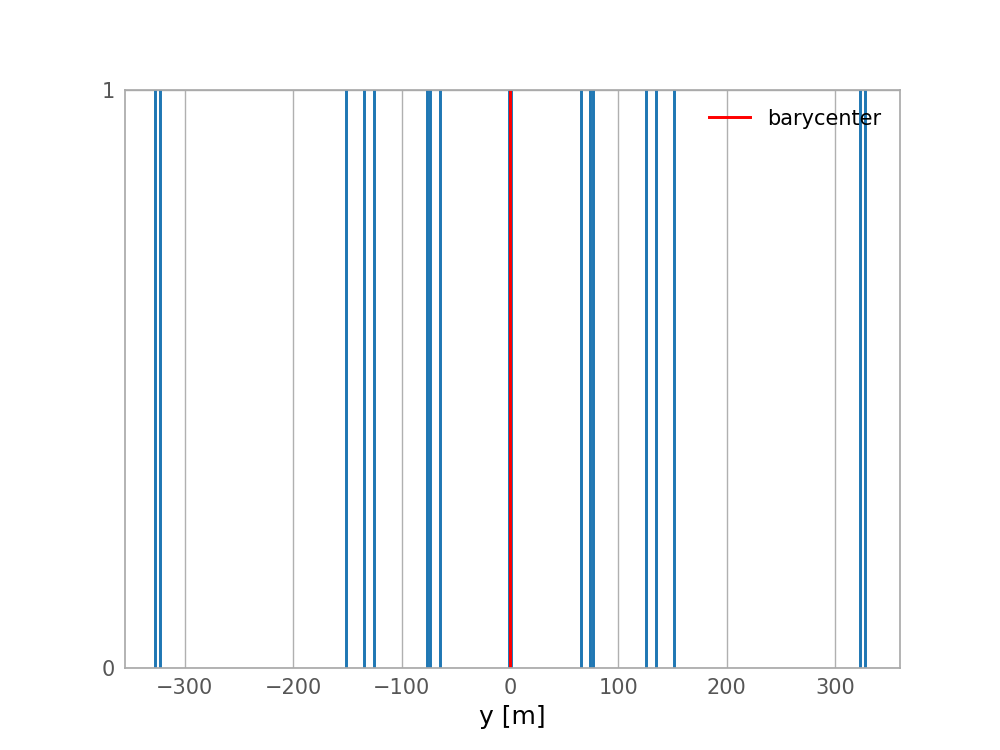

<Axes: xlabel='y [m]'>

In [14]:
# 1D
array.display("y")

<IPython.core.display.Javascript object>


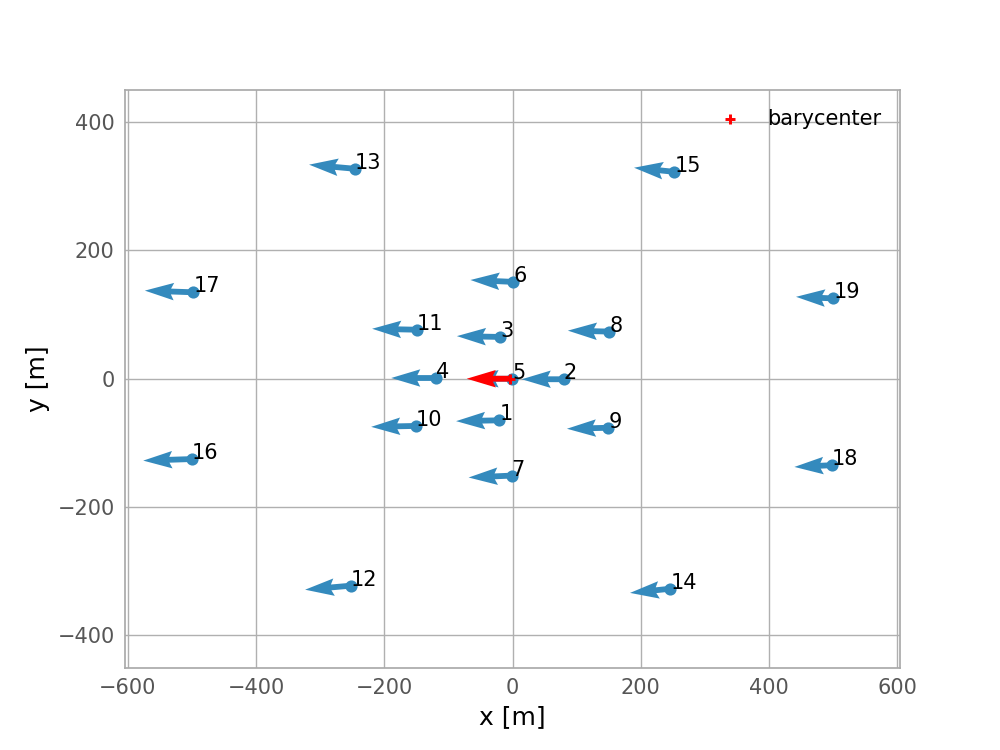

<Axes: xlabel='x [m]', ylabel='y [m]'>

In [15]:
# 2D
array.display("xy")

<IPython.core.display.Javascript object>


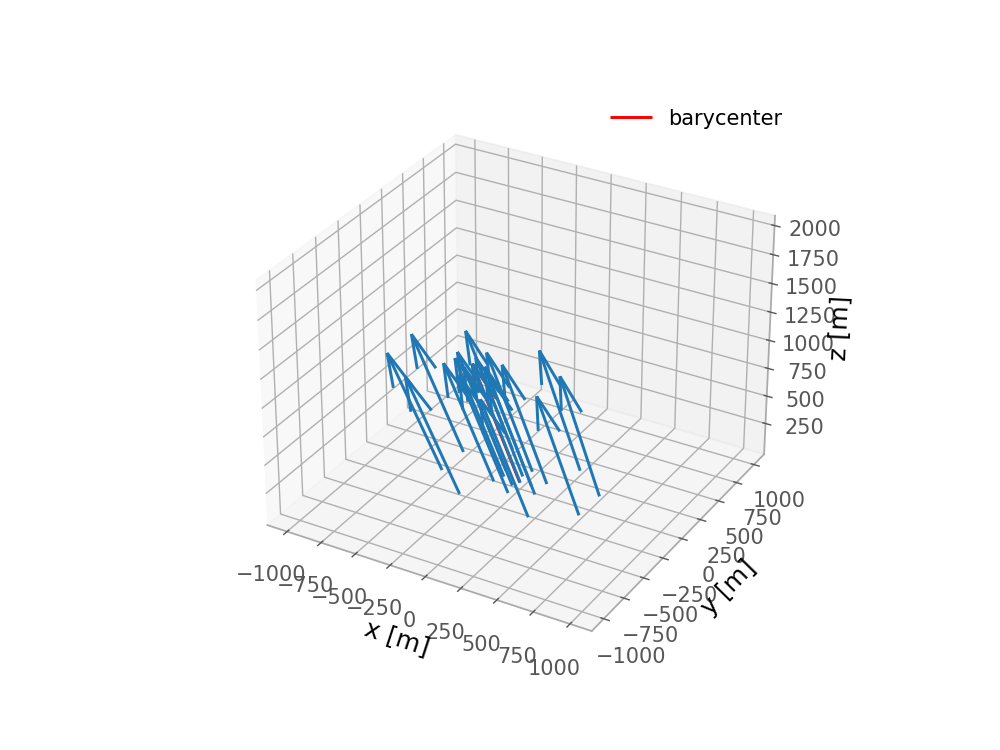

<Axes3D: xlabel='x [m]', ylabel='y [m]', zlabel='z [m]'>

In [16]:
# 3D
array.display("xyz")

100%|███████████████████████████████████████████| 19/19 [00:04<00:00,  4.56it/s]


<IPython.core.display.Javascript object>


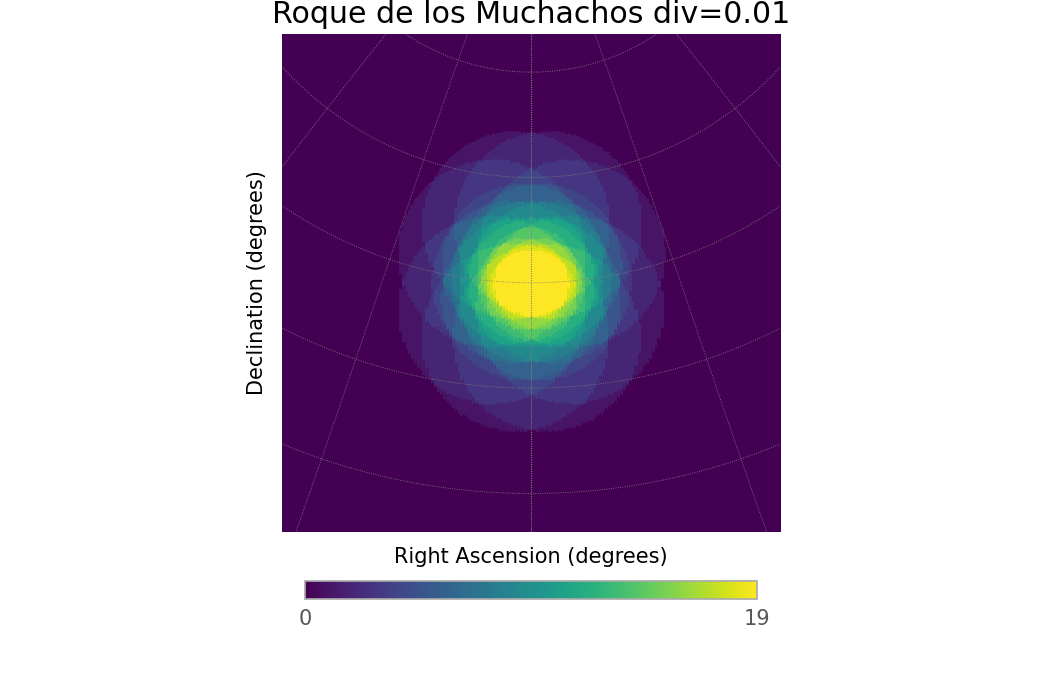

In [17]:
# Multiplicity plot
array.multiplicity_plot()